# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exercise 1 (Reading and processing data)

In [2]:
pd_reader = pd.read_csv(header=None, names=['age','FEV1','height','gender','smoking status','weight'],sep='\t',\
                        filepath_or_buffer="./smoking.csv")
df = pd.DataFrame(pd_reader)
df

,age,FEV1,height,gender,smoking status,weight
0,9,1.708,57.0,0,0,9.540109
1,8,1.724,67.5,0,0,11.110110
2,7,1.720,54.5,0,0,9.513850
3,9,1.558,53.0,1,0,11.455923
4,9,1.895,57.0,1,0,10.297130
...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,9.595947
650,15,3.727,68.0,1,1,8.530756
651,18,2.853,60.0,0,0,11.251590
652,16,2.795,63.0,0,1,9.037336


In [3]:
smokers = df[df['smoking status'].isin([1])]
non_smokers = df[df['smoking status'].isin([0])]
avgFEV1_smokers = np.mean(smokers['FEV1'])
avgFEV1_non_smokers = np.mean(non_smokers['FEV1'])
print("average FEV1 of smokers is "+str(avgFEV1_smokers))
print("average FEV1 of non-smokers is "+str(avgFEV1_non_smokers))

average FEV1 of smokers is 3.2768615384615383
average FEV1 of non-smokers is 2.5661426146010187


<font face='Calibri'><font size=3>It is weird because smokers have a higher average FEV1 (3.28) than non-smokers (2.57).</font>

### Exercise 2 (Boxplots)

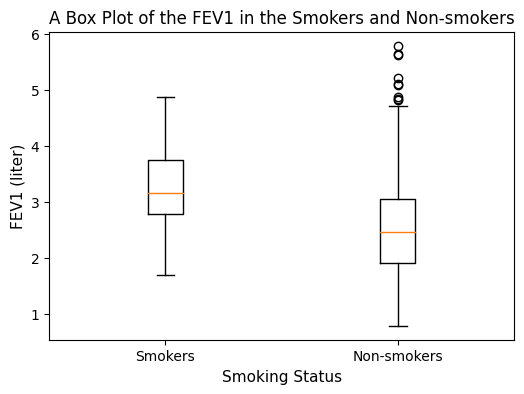

In [4]:
plt.figure(figsize=(6,4),facecolor='w')
plt.boxplot([smokers["FEV1"], non_smokers["FEV1"]], labels = ["Smokers","Non-smokers"])
plt.xlabel("Smoking Status",fontsize=11)
plt.ylabel('FEV1 (liter)',fontsize=11)
plt.title('A Box Plot of the FEV1 in the Smokers and Non-smokers')
plt.show()

<font face='Calibri'><font size=3>Compared with the smokers group, there are many outliers with high FEV1 values in the non-smokers group. And the range of the FEV1 values in non-smokers group is larger.</font>

### Exercise 3 (Hypothesis testing)

<font face='Calibri'><font size=3>Suppose that 
<br/>H0: the FEV1 levels of smokers and non-smokers have the same mean.<br/>
H1: the FEV1 levels of smokers and non-smokers do not have the same mean.</font>

In [5]:
varFEV1_smokers = np.var(smokers['FEV1'])
varFEV1_non_smokers = np.var(non_smokers['FEV1'])
print("variance of FEV1 in smokers is "+str(varFEV1_smokers))
print("variance of FEV1 in non-smokers is "+str(varFEV1_non_smokers))
nFEV1_smokers = smokers.shape[0]
nFEV1_non_smokers = non_smokers.shape[0]
print("number of smokers is "+str(nFEV1_smokers))
print("number of non-smokers is "+str(nFEV1_non_smokers))

variance of FEV1 in smokers is 0.5538259346745561
variance of FEV1 in non-smokers is 0.7221586893384949
number of smokers is 65
number of non-smokers is 589


In [6]:
t = (avgFEV1_smokers - avgFEV1_non_smokers)/np.sqrt(varFEV1_smokers/nFEV1_smokers+varFEV1_non_smokers/nFEV1_non_smokers)
print("t is "+str(t))
v = (varFEV1_smokers/nFEV1_smokers + varFEV1_non_smokers/nFEV1_non_smokers)**2/\
    (varFEV1_smokers**2/((nFEV1_smokers-1)*nFEV1_smokers**2) +\
     varFEV1_non_smokers**2/((nFEV1_non_smokers-1)*nFEV1_non_smokers**2))
v = np.floor(v)
print("v is "+str(v))
from scipy.stats import t
p = 2*t.cdf(-7.199,83)
print("p is "+str(p))

t is 7.1990318609997095
v is 83.0
p is 2.494923156356737e-10


<font face='Calibri'><font size=3>Since p=2.49e-10 which is smaller than the significance level α=0.05, we could reject the null hypothesis. So, the FEV1 values in smokers and non-smokers have different mean. The difference makes sense but it is still weird that smokers have higher FEV1 levels.</font>

### Exercise 4 (Correlation)

In [7]:
age = df['age']
FEV1 = df['FEV1']

In [8]:
import scipy.stats
pearson_r = scipy.stats.pearsonr(age,FEV1)[0]
spearman_r = scipy.stats.spearmanr(age,FEV1)[0]
print("Pearson's correlation coefficient is " + str(pearson_r))
print("Spearman's rank correlation coefficient is " + str(spearman_r))

Pearson's correlation coefficient is 0.7564589899895999
Spearman's rank correlation coefficient is 0.7984229001546537


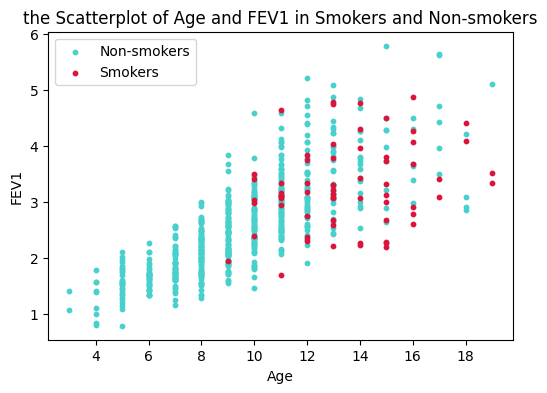

In [9]:
age_smokers = smokers['age']
age_non_smokers = non_smokers['age']
FEV1_smokers = smokers['FEV1']
FEV1_non_smokers = non_smokers['FEV1']
plt.figure(figsize=(6,4))
plt.scatter(age_non_smokers, FEV1_non_smokers,color='mediumturquoise',s=10,label='Non-smokers')
plt.scatter(age_smokers, FEV1_smokers,color='crimson',s=10,label='Smokers')
plt.title('the Scatterplot of Age and FEV1 in Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.legend(loc='upper left')
plt.show()

<font face='Calibri'><font size=3>The Pearson's correlation coefficient and Spearman's rank correlation coefficient indicate that with the increase of age, the FEV1 will increase too (with the coefficient of 0.75 or 0.80). The scatterplot shows that all smokers are over 9 years old. It gives an explanation that why smokers have higher FEV1 level - because they are older than non-smokers in general, and with the increase of age, the FEV1 will increase.</font>

### Exercise 5 (Histograms)

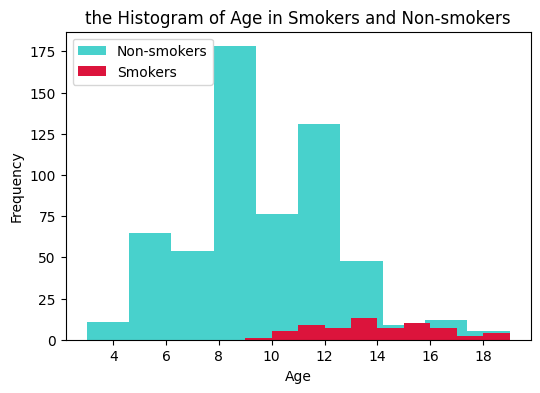

In [10]:
plt.figure(figsize=(6,4))
plt.hist(age_non_smokers,color='mediumturquoise',label='Non-smokers')
plt.hist(age_smokers,color='crimson',label='Smokers')
plt.title('the Histogram of Age in Smokers and Non-smokers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

<font face='Calibri'><font size=3> From this histogram, we could see the mean age of smokers is around 14 while the mean age of non-smokers is around 9. The age is an inference fator in this study as I have mentioned in Exercise 4. If we would like to compare FEV1 level in smokers and non-smokers, we need two groups in similar age.</font>